In [1]:
# Imports
import numpy as np
import math
import cv2
import skimage.measure
import matplotlib.pyplot as plt
import imutils
%matplotlib inline

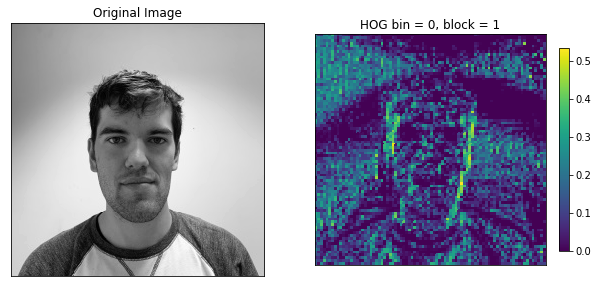

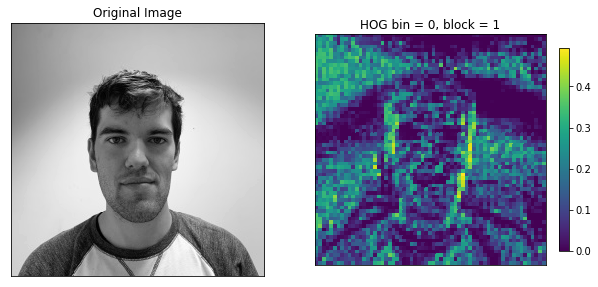

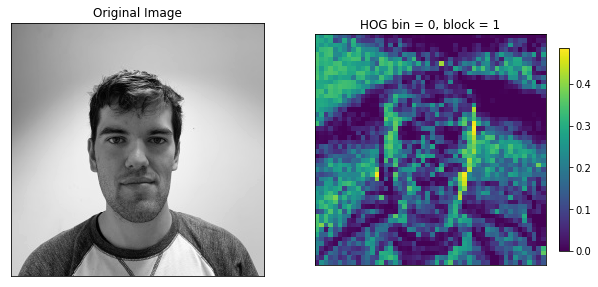

In [2]:
block_size = (2, 2)  # h x w in cells
nbins = 9  # number of orientation bins
cell_size_list = [3, 4, 5]
img = cv2.cvtColor(cv2.imread("./photos/preprocessed/train/IMG_1512.jpg"), cv2.COLOR_BGR2GRAY)

# Define as input the mode to use (train or test)
def hog_features(img):
    feature_list = []
    # Go through each image in the folder
    for c in cell_size_list:
        cell_size = (c, c) # h x w in pixels
       
        # create HoG Object
        # winSize is the size of the image cropped to multiple of the cell size
        # all arguments should be given in terms of number of pixels
        hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                  img.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

        n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])

        # Compute HoG features
        hog_feats = hog.compute(img) \
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[1], block_size[0], nbins) \
               .transpose((1, 0, 3, 2, 4))  # index blocks by rows first
        
        
        plt.figure(figsize = (10,10))
        plt.subplot(121)
        plt.imshow(img, cmap='gray')
        plt.title("Original Image"), plt.xticks([]), plt.yticks([])
            
        plt.subplot(122)
        plt.pcolor(hog_feats[:, :, 0,0,0])
        plt.gca().invert_yaxis()
        plt.gca().set_aspect('equal', adjustable='box')
        plt.title("HOG bin = 0, block = 1"), plt.xticks([]), plt.yticks([])
        plt.colorbar(fraction=0.04)
        plt.show()
        
        feature_list.append(hog_feats)
    return feature_list

hog_list = hog_features(img)